<div style="border:solid purple 2px; padding: 20px"> 

Привет Айгуль! 👋

Меня зовут Рустам Муртазин, и я буду делать ревью твоей работы. Давай будем общаться на **«ты»**. Если это неприемлемо, обязательно напиши мне в комментариях — мы перейдем на **«вы»**.

Я не хочу указавать тебе на совершенные тобою ошибки, а хочу поделиться своим опытом и помочь тебе стать настоящим профессионалом и сделать проект еще лучше.

Обрати внимание в первую очередь на те, что помечаны <span style="color:red">красным цветом</span>. После их доработки проект будет принят. <span style="color:green">Зеленым цветом</span> отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. <span style="color:orange">Оранжевым цветом</span> выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно). Также в проекте могут быть небольшие «лайфхаки» по Python, не относящиеся к проекту, их я выделил фиолетовым цветом)

Давай работать над проектом в диалоге: если ты **что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».

Мне понравился твой проект, есть пару замечаний, но их не много, я думаю ты быстро справишься. Жду твою работу на повторное ревью :)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Расчет-объёма-сырья-для-безубыточной-разработки." data-toc-modified-id="Расчет-объёма-сырья-для-безубыточной-разработки.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Расчет объёма сырья для безубыточной разработки.</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [241]:
import numpy as np 
import pandas as pd
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [242]:
data_1 = pd.read_csv('/datasets/geo_data_0.csv')
data_2 = pd.read_csv('/datasets/geo_data_1.csv')
data_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [250]:
cols = [data_1, data_2, data_3]
def inf_head(data):
    for col in cols:
        print(col.head())
        print(col.info())
inf_head(cols)

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  1

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

В данном проекте мы работаем с данными одинаковой природы, а это значит, что большинство расчетов для регионов будут повторяться. Это отличная возможность потренироваться над оптимизацией кода. Например, вот здесь. Первичное знакомство с данными можно было реализовать в функции и вызывать эту функцию для каждого из датафреймов (в цикле в идеале)

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Исправила.
        

In [ ]:
[display(data.head()) for data in [data_1, data_2, data_3]];

In [203]:
print([data.isna().sum() for data in [data_1, data_2, data_3]])

[id         0
f0         0
f1         0
f2         0
product    0
dtype: int64, id         0
f0         0
f1         0
f2         0
product    0
dtype: int64, id         0
f0         0
f1         0
f2         0
product    0
dtype: int64]


In [204]:
data_all=[data_1, data_2, data_3]
for data in data_all:
    print(data.duplicated().sum())

0
0
0


In [205]:

for data in data_all:
    print(data.duplicated(subset = ['id']).sum())

10
4
4


In [206]:
data_1[data_1.duplicated(subset = ['id'])]

,id,f0,f1,f2,product
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
66136,74z30,1.084962,-0.312358,6.990771,127.643327
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
75715,Tdehs,0.112079,0.430296,3.218993,60.964018
90815,fiKDv,0.049883,0.841313,6.394613,137.346586
92341,TtcGQ,0.110711,1.022689,0.911381,101.318008
97785,bsk9y,0.378429,0.005837,0.160827,160.637302


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

По некоторым скважинам информация дублируется, возможно, произошел какой-то баг при записи данных в базу, а возможно и нет. В любом случае, данный момент нужно уточнять у заказчика. Я бы вынес его отдельно, в конец проекта, например

Ошибка из-за невнимательности. Все исправила.

In [207]:
data_2[data_2.duplicated(subset = ['id'])]

,id,f0,f1,f2,product
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044


In [208]:
data_3[data_3.duplicated(subset = ['id'])]

,id,f0,f1,f2,product
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572


In [209]:
[display(data.corr().round(5).head(3)) for data in [data_1, data_2, data_3]];

,f0,f1,f2,product
f0,1.00000,-0.44072,-0.00315,0.14354
f1,-0.44072,1.00000,0.00172,-0.19236
f2,-0.00315,0.00172,1.00000,0.48366


,f0,f1,f2,product
f0,1.00000,0.18229,-0.00178,-0.03049
f1,0.18229,1.00000,-0.00260,-0.01015
f2,-0.00178,-0.00260,1.00000,0.99940


,f0,f1,f2,product
f0,1.00000,0.00053,-0.00045,-0.00199
f1,0.00053,1.00000,0.00078,-0.00101
f2,-0.00045,0.00078,1.00000,0.44587


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Очень правильное решение посмотреть корреляции. Хотя я бы еще построил диаграммы рассеивания. Признаки можно преобразовать, если есть какая-то выраженная, но нелинейная зависимость, которую мы коэффициентами корреляции Пирсона не выявим, мы можем попытаться преобразовать признаки так, чтобы получить линейную зависимость.

In [210]:
#Написала функцию которая удаляет заданый лишний признак
def drop_col(data, column):
    return data.drop([column], axis = 1)
#Применили функцию на данных
data_1 = drop_col(data_1, 'id')
data_2 = drop_col(data_2, 'id')
data_3 = drop_col(data_3, 'id')


In [211]:
#Написала функцию для деления данных на выборки заданной размерности
def test_split(data):
    data_train, data_valid = train_test_split(data, test_size=0.25, random_state=12345, shuffle = True)
    
    return data_train, data_valid
#Применили функцию на данных
data_1_train, data_1_valid = test_split(data_1)
data_2_train, data_2_valid = test_split(data_2)
data_3_train, data_3_valid = test_split(data_3)

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Круто, что ты фиксируешь `random_state`. Кстати, его можно задать один раз в начале проекта, например, используя любимый нами [numpy](https://pyprog.pro/random_sampling_functions/seed.html?)

In [212]:
#Написала функцию для выделения целевого признака из данных.
def get_target(data, col):
    return data[col]

#Написала функцию для выделения признаков кроме целевого
def get_features(data, col):
    return data.drop([col], axis = 1)

#Написала функцию обьединяющую две предыдущие
def featr_targt(data, target_col):
    features_train = get_features(data, target_col)
    target_train = get_target(data, target_col)
    return features_train, target_train


In [213]:
list_1 = [features_1_train, features_2_train, features_3_train] 
list_2 = [target_1_train, target_2_train, target_3_train]

for x, y in zip(list_1, list_2):
    print(f'{x} is {y}')





             f0        f1        f2
27212 -0.544828  1.390264 -0.094959
7866   1.455912 -0.480422  1.209567
62041  0.260460  0.825069 -0.204865
70185 -1.837105  0.010321 -0.147634
82230 -1.299243  0.987558  1.273181
...         ...       ...       ...
4094   1.567114 -1.087243 -0.272211
85412 -1.904207 -0.525360  1.327530
2177   0.418949 -1.296788 -0.196407
77285  0.400077 -1.466874 -0.445317
86498  1.746246  0.027415  2.766848

[75000 rows x 3 columns] is 27212    147.370612
7866     147.630053
62041     77.696728
70185     55.210501
82230    113.891723
            ...    
4094     124.380793
85412    144.874913
2177     134.967255
77285     64.494357
86498    151.514894
Name: product, Length: 75000, dtype: float64
             f0        f1        f2
27212 -0.850855  0.624428  0.296943
7866   1.971935  1.832275  0.294333
62041  1.079305  0.170127 -0.296418
70185 -1.512028 -0.887837 -0.880471
82230 -1.804775 -0.718311 -0.293255
...         ...       ...       ...
4094  -0.334573 -0.005

In [214]:
list_3 = [features_1_valid, features_2_valid, features_3_valid]
list_4 = [target_1_valid, target_2_valid, target_3_valid]  
for x, y in zip(list_3, list_4):
    print(f'{x} is {y}')


             f0        f1        f2
71751  0.517917 -0.610097 -0.126226
80493  0.568391 -0.086063 -0.814914
2655   0.805688 -1.613289 -1.341342
53233  0.222503 -1.355437 -0.597275
91141 -0.087941  1.433113 -0.544588
...         ...       ...       ...
12581  1.541222 -0.709525  0.024535
18456 -0.522565  0.474447 -0.103985
73035 -0.138850  1.595071 -0.903485
63834  0.658267 -1.428224  0.621967
43558  1.409556 -0.650407  0.769670

[25000 rows x 3 columns] is 71751     10.038645
80493    114.551489
2655     132.603635
53233    169.072125
91141    122.325180
            ...    
12581    170.116726
18456     93.632175
73035    127.352259
63834     99.782700
43558    177.821022
Name: product, Length: 25000, dtype: float64
             f0        f1        f2
71751 -0.168616  0.571372  0.297471
80493  0.878384 -1.772903 -0.293901
2655  -0.852976 -0.004986 -0.876502
53233  1.496940 -1.146077 -0.294011
91141  0.552177  0.057961 -1.457764
...         ...       ...       ...
12581 -0.585274  0.036

<div style="border:solid purple 5px; padding: 20px"> 
<h2 align="center"> Рубрика «Питонячий лайфхакер» <a class="tocSkip"> </h2>

<h3> Функция zip <a class="tocSkip"> </h3>

Функция zip создаёт итератор, который комбинирует элементы нескольких списков. Это позволяет осуществлять параллельный обход списков в циклах for или, например, выполнять параллельную сортировку.

![](https://i.ibb.co/MPPZ6TL/image.png)

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Исправила.
        

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Так ведь это не ошибка была, так, доп информация...

In [255]:
#Написали функцию которая масштабирует выборки
def num_scal(data_train, data_valid):
    numeric = data_train.columns

    scaler = StandardScaler()
    scaler.fit(data_train[numeric])
    data_train[numeric] = scaler.transform(data_train[numeric])
    data_valid[numeric] = scaler.transform(data_valid[numeric])
    return data_train, data_valid
#Масштабировали признаки с числовыми значениями разных размерностей
num_scal(features_1_train, features_1_valid)
num_scal(features_2_train, features_2_valid)
num_scal(features_3_train, features_3_valid)

#Вывели первые 5 обьектов на экран
print(features_1_train.head(5))
print(features_2_train.head(5))
print(features_3_train.head(5))


             f0        f1        f2
27212 -0.544828  1.390264 -0.094959
7866   1.455912 -0.480422  1.209567
62041  0.260460  0.825069 -0.204865
70185 -1.837105  0.010321 -0.147634
82230 -1.299243  0.987558  1.273181
             f0        f1        f2
27212 -0.850855  0.624428  0.296943
7866   1.971935  1.832275  0.294333
62041  1.079305  0.170127 -0.296418
70185 -1.512028 -0.887837 -0.880471
82230 -1.804775 -0.718311 -0.293255
             f0        f1        f2
27212 -0.526160  0.776329 -0.400793
7866  -0.889625 -0.404070 -1.222936
62041 -1.133984  0.208576  0.296765
70185  1.227045  1.570166 -0.764556
82230 -0.194289  0.878312  0.840821


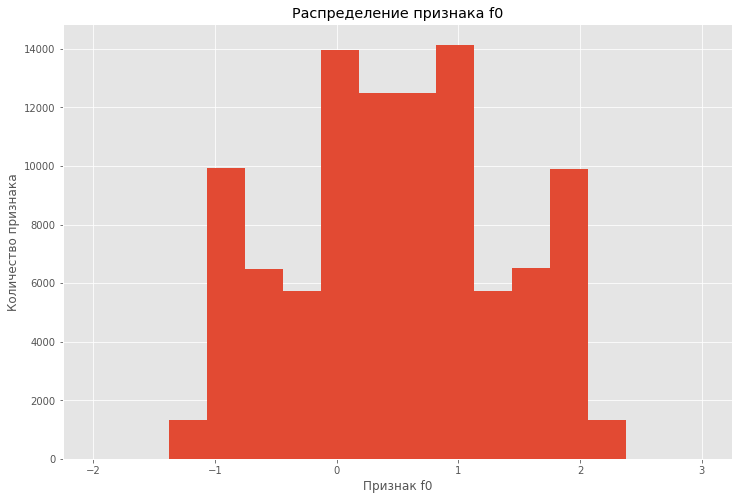

In [256]:
#Вывела гистаграмму каждого признака
plt.hist(data_1['f0'], bins=16, range=(-2,3))
plt.title('Распределение признака f0')
plt.xlabel('Признак f0')
plt.ylabel('Количество признака')
plt.show()

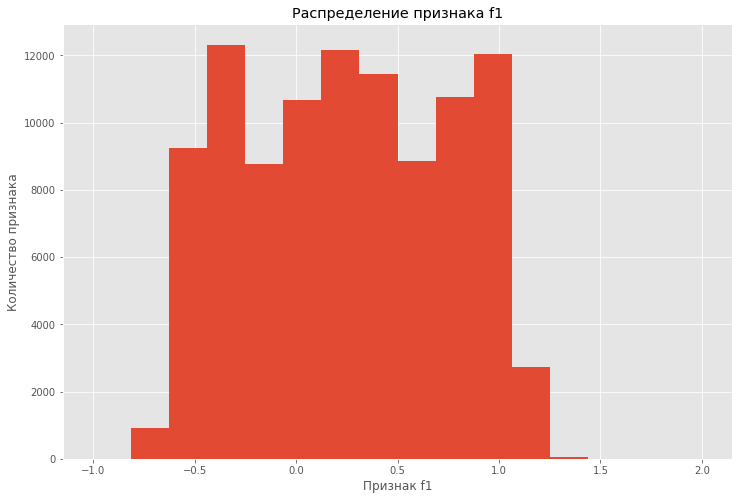

In [257]:
#Вывела гистаграмму каждого признака
plt.hist(data_1['f1'], bins=16, range=(-1,2))
plt.title('Распределение признака f1')
plt.xlabel('Признак f1')
plt.ylabel('Количество признака')
plt.show()

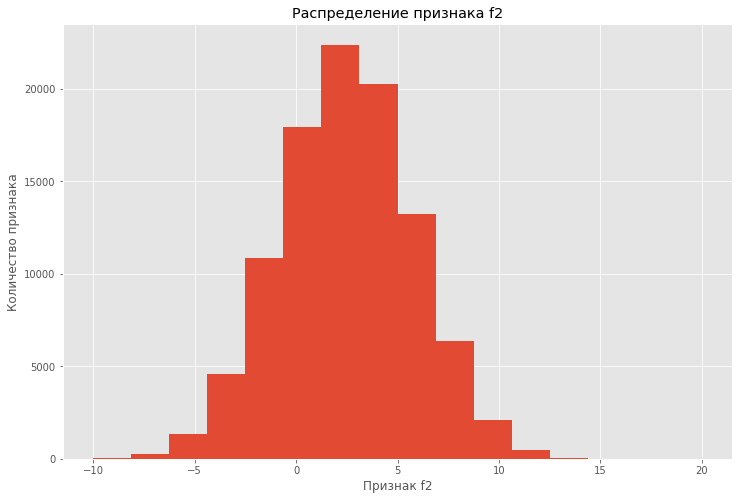

In [258]:
#Вывела гистаграмму каждого признака
plt.hist(data_1['f2'], bins=16, range=(-10,20))
plt.title('Распределение признака f2')
plt.xlabel('Признак f2')
plt.ylabel('Количество признака')
plt.show()

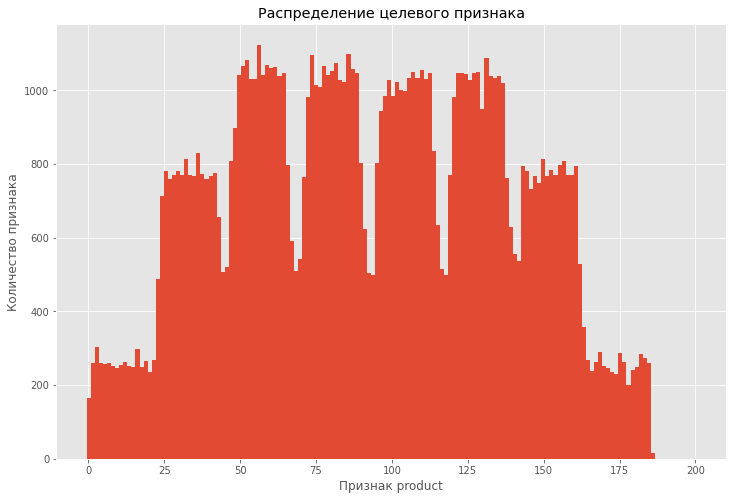

In [259]:
#Вывела гистаграмму каждого признака
plt.hist(data_1['product'], bins=150, range=(-0.5,200))
plt.title('Распределение целевого признака')
plt.xlabel('Признак product')
plt.ylabel('Количество признака')
plt.show()

**Вывод:**
* После изучения в данных отсутствуют пропусков
* Дубликаты присутствую в колонке id, количество не критично оставляем как есть.
* Типы данных соответствуют.
* По кор.матрице целевой признак второго региона сильно корелирует с признаком f2.
* Лишний признак id удалили.
* Разделили даные на выборки в соотношении 75:25.
* Выделии данные на целевой признак и все остальные.
* Также масштабировали числовые признаки.
* Признак f2 на графике показывает нормальное распределение.

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

А еще, я бы построил графики распределений признаков - много полезной информации можно получить

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Исправила.
        

## Обучение и проверка модели

In [260]:
#Написала функцию для обучения на модели линейная регрессия
def Linear_Regres(features, target):
    model = LinearRegression()
    model.fit(features, target)
    return model
model_1 = Linear_Regres(features_1_train, target_1_train)
model_2 = Linear_Regres(features_2_train, target_2_train)
model_3 = Linear_Regres(features_3_train, target_3_train);

In [261]:
#Вывела функцию для предсказания на модели линейная регрессия
def find_predictions(model, features_valid, indexes):
    predictions = model.predict(features_valid)
    
    np_array = np.array(predictions)
    new_predictions = pd.Series(np_array, index = indexes)
    
    return new_predictions
predictions_1 = find_predictions(model_1, features_1_valid, target_1_valid.index)
predictions_2 = find_predictions(model_2, features_2_valid, target_2_valid.index)
predictions_3 = find_predictions(model_3, features_3_valid, target_3_valid.index)

In [262]:
#Написала функции метрик регрессии
def mse(target, predicted):
    print("MSE =", mean_squared_error(target, predicted))

def rmse(target, predicted):
    print("RMSE =", mean_squared_error(target, predicted) ** 0.5)

def r2(target, predicted):
    print("R2 =", r2_score(target, predicted))
    
def mean_pred(predicted):
    print('Средний предсказанный запас сырья:', predicted.mean())



<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Здесь все круто

Метрики обьема добычи для первого региона

In [263]:
#Применила функции для первого региона
mse(target_1_valid, predictions_1)
rmse(target_1_valid, predictions_1)
r2(target_1_valid, predictions_1)
mean_pred(predictions_1)


MSE = 1412.2129364399243
RMSE = 37.5794217150813
R2 = 0.27994321524487786
Средний предсказанный запас сырья: 92.59256778438035


In [264]:
#Вывела метрики 2 региона
mse(target_2_valid, predictions_2)
rmse(target_2_valid, predictions_2)
r2(target_2_valid, predictions_2)
mean_pred(predictions_2)


MSE = 0.7976263360391157
RMSE = 0.893099286775617
R2 = 0.9996233978805127
Средний предсказанный запас сырья: 68.728546895446


In [265]:
#Вывела метрики для 3 региона
mse(target_3_valid, predictions_3)
rmse(target_3_valid, predictions_3)
r2(target_3_valid, predictions_3)
mean_pred(predictions_3)


MSE = 1602.3775813236196
RMSE = 40.02970873393434
R2 = 0.20524758386040443
Средний предсказанный запас сырья: 94.96504596800489


**Вывод:**
* Самый высокий показатель среднего предсказанного у третьего региона но R2 самое низкое
* Поэтому модель по тртьему региону хуже всех предсказывает.
* Показатель R2 – самый высокий у второго региона
* Значения метрики R2, > 0 и стремится к 1. Это произошло за счёт, фактически, прямой корреляции 
одного из признаков с целевым, замеченной нами ранее.

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Да, так и есть. Я бы выделил это и обозначил перед заказчиком

## Подготовка к расчёту прибыли

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших
для разработки. Бюджет на разработку скважин в регионе — 10 млрд рублей. 
При нынешних ценах один баррель сырья приносит 450 рублей дохода. 
Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

In [266]:
#Присвоила переменные для данных нам условии
#бюджет
BUDGET = 10000000000
#количество скважин
WELL_QUAN = 200
#Доход с тысяч скважин
INCOME_PER_UNIT = 450000


<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

По правилам написания кода [PEP8](https://pep8.org/), константы определяют заглавными буквами)

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Исправила.
        

### Расчет объёма сырья для безубыточной разработки.

In [228]:
#Вывели формулу расчета безубыточного обьема 
breakeven_volume = BUDGET / INCOME_PER_UNIT / WELL_QUAN
#вывели на экран обьем разработки
print('Обьем безубыточной разработки:', breakeven_volume)

Обьем безубыточной разработки: 111.11111111111111


In [229]:
#Вывели на экран средние реальные значения обьема по каждому региону
print('Средний обьем разработки в первом регионе', data_1['product'].mean())
print('Средний обьем разработки во втором регионе', data_2['product'].mean())
print('Средний обьем разработки в третьем регионе', data_3['product'].mean())

Средний обьем разработки в первом регионе 92.50000000000001
Средний обьем разработки во втором регионе 68.82500000000002
Средний обьем разработки в третьем регионе 95.00000000000004


**Вывод:**
* Объём сырья для безубыточной разработки новой скважины равен 111.11, но при этом объем запасов
среднестатистической скважины в регионах  меньше этого значения: 92.5, 68.83, 95.
* При этом особенно выделяется 2-ой регион, средние запасы которого меньше необходимых 111,11 на 68.83
* Но, при этом, наша модель очень хорошо прогнозирует запасы скважин именно в этом регионе.



<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Так и есть, это может говорить о том, что мы не можем рандомно выбирать скважины для разработки, ведь в таком случае, нас, возможно, ждет неудача

## Расчёт прибыли и рисков 

In [230]:
#Вывела функцию подсчета прибыли для выбранных скважин.
def revenue(target, predicted, cost, count):
    probs_sorted = predicted.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return cost * selected.sum() - BUDGET

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Сортируем по прогнозам, берем факт 👍

In [231]:
#Написала функцию, в которой сгенерируем 1000 выборок, чтобы найти распределение прибыли
def best_bootsrtap(target, predicted):
    state = np.random.RandomState(12345)
    N = 500
    A = 200
    values = []
    for i in range(1000):
        target_subsample = target.sample(N, replace=True, random_state=state)
        predict_subsample = predicted[target_subsample.index] 
    
        values.append(revenue(target_subsample, predict_subsample, INCOME_PER_UNIT, A))

    values = pd.Series(values)
    return values



<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

Хорошо бы кол-во точек, используемых при разведке (500) и кол-во лучших (200) также вынести в константы. Это позволит быстро проводить расчеты при различных параметрах и избавит от монотонных исправлений

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Исправила.
        

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Спасибо за быструю и качественную доработку комментариев! Все моменты были исправлены, так что работу я принимаю. Надеюсь ты учтешь мои комментарии в последующих работах. Благодарю за старания и интерес и желаю успехов в дальнейших проектах 😊

</div>

In [267]:
region_1 = best_bootsrtap(target_1_valid, predictions_1)
region_2 = best_bootsrtap(target_2_valid, predictions_2)
region_3 = best_bootsrtap(target_3_valid, predictions_3)

In [268]:
#Написала функция подсчета средней выручки, доверительного интервала, и риска.
def mean_dov_risk(values):
    print("Средняя выручка:", values.mean())
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    print("95%-й Доверительный интервал:", lower, '-', upper)
    print("Риск убытков:", st.percentileofscore(values, 0), '%')

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

Я бы, наверное, объединил все эти расчеты в одну функцию

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Исправила.
        

In [235]:
mean_val(region_1)
dov_interval(region_1)
risk_of_loss(region_1)

Средняя выручка: 425938526.91059244
95%-й Доверительный интервал: -102090094.83793654 - 947976353.3583689
Риск убытков: 6.0 %


In [236]:
mean_val(region_2)
dov_interval(region_2)
risk_of_loss(region_2)

Средняя выручка: 515222773.4432899
95%-й Доверительный интервал: 68873225.37050176 - 931547591.2570494
Риск убытков: 1.0 %


In [237]:
mean_val(region_3)
dov_interval(region_3)
risk_of_loss(region_3)

Средняя выручка: 435008362.7827556
95%-й Доверительный интервал: -128880547.32978901 - 969706954.1802661
Риск убытков: 6.4 %


**Вывод**
* Изначально 2-й регион никак не подходил под выбор для разработки скважин. 
* Поскольку средние запасы региона (68.8) гораздо меньше чем остальных регионов (92-95) 
и рассчитанного запаса для безубыточной разработки месторождения (111.11). 
* Однако благодаря качественно прогнозирующей модели, самые оптимистичные прогнозы касаются именно 2-го региона. 
* Риск убытков региона всего 0.4% что является самаым низким среди других. 
* И поэтому этот регион и предлагается для разработки на основании проведенного исследования.

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

🔥👍

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован